# Projeto criado com a base de dados de "perfomance de estudantes", do site Kagggle

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('StudentsPerformance.csv', sep = ",")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.shape

(1000, 8)

In [11]:
df.duplicated().sum()

0

<Axes: >

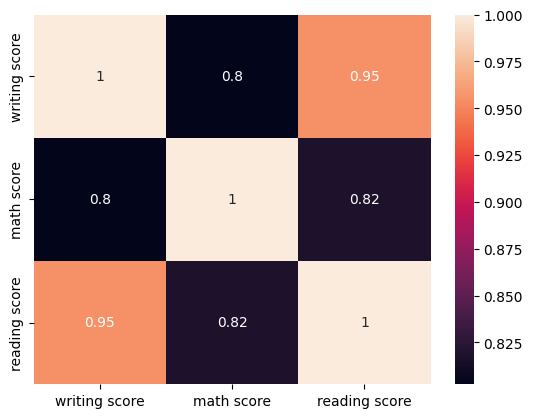

In [21]:
sns.heatmap(data = df[['writing score', 'math score', 'reading score']].corr(), annot = True)

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [25]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [34]:
df['gender'].value_counts(normalize = True) * 100

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

In [35]:
df['race/ethnicity'].value_counts(normalize = True) * 100

race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

In [60]:
df['parental level of education'].value_counts(normalize = True) * 100

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

In [67]:
df['lunch'].value_counts(normalize = True) * 100

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

In [69]:
df['test preparation course'].value_counts(normalize = True) * 100

test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

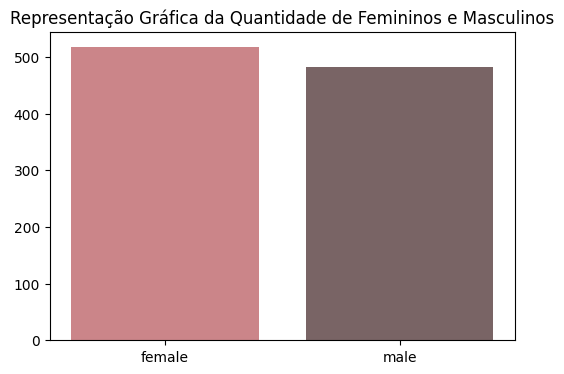

In [82]:
plt.figure(figsize=(6 , 4))
cores = ['#cb8589','#796465']
plt.title('Representação Gráfica da Quantidade de Femininos e Masculinos')
plt.bar(df['gender'].value_counts().index, df['gender'].value_counts(), color = cores);

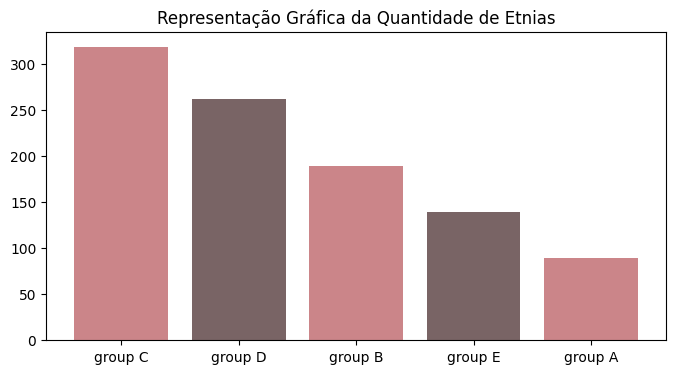

In [83]:
plt.figure(figsize=(8 , 4))
cores = ['#db7f67','#dbbea1', '#a37b73', '#3f292b', '#d34f73']
plt.title('Representação Gráfica da Quantidade de Etnias')
plt.bar(df['race/ethnicity'].value_counts().index, df['race/ethnicity'].value_counts(), color = cores);

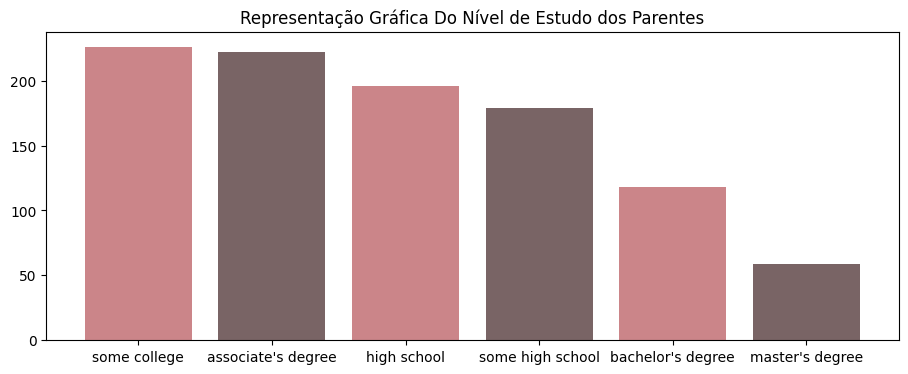

In [64]:
plt.figure(figsize=(11 , 4))
cores = ['#cb8589','#796465']
plt.title('Representação Gráfica Do Nível de Estudo dos Parentes')
plt.bar(df['parental level of education'].value_counts().index, df['parental level of education'].value_counts(),
        color = cores);

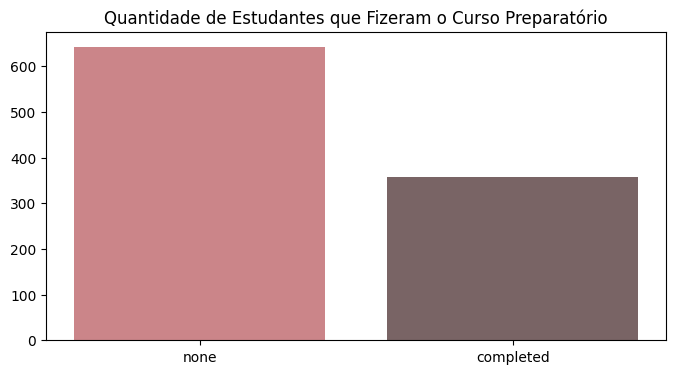

In [76]:
plt.figure(figsize=(8 , 4))
cores = ['#cb8589','#796465']
plt.title('Quantidade de Estudantes que Fizeram o Curso Preparatório')
plt.bar(df['test preparation course'].value_counts().index, df['test preparation course'].value_counts(),
        color = cores);

<Axes: xlabel='writing score', ylabel='gender'>

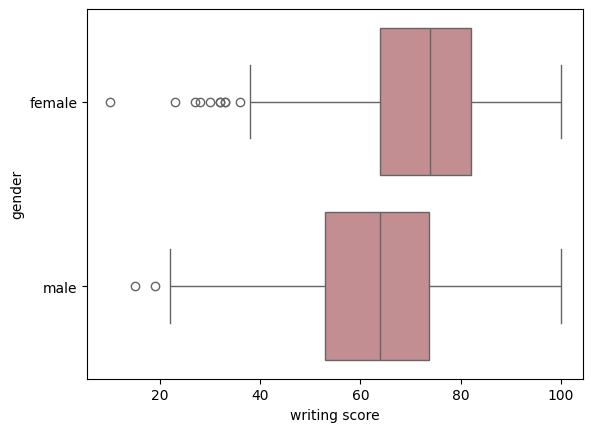

In [91]:
sns.boxplot(data = df, x = 'writing score', y = 'gender', color='#cb8589')

<Axes: xlabel='reading score', ylabel='gender'>

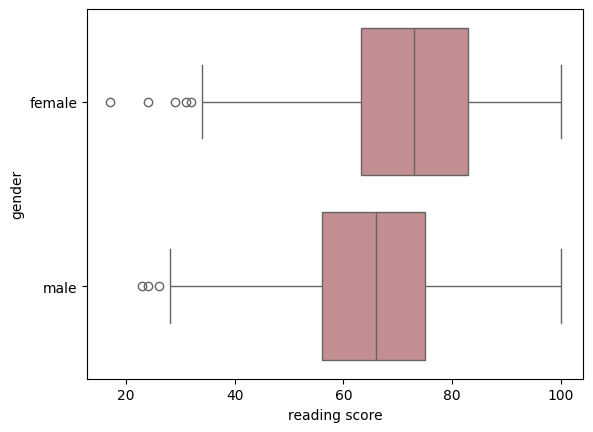

In [88]:
sns.boxplot(data = df, x = 'reading score', y = 'gender', color = '#cb8589')

<Axes: xlabel='math score', ylabel='gender'>

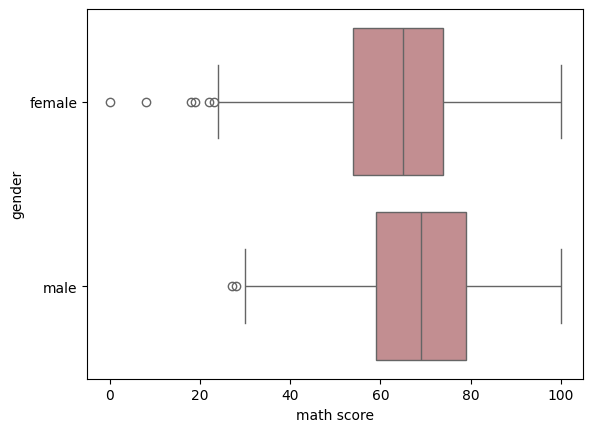

In [90]:
sns.boxplot(data = df, x = 'math score', y = 'gender', color='#cb8589')

In [93]:
df.groupby(by = ['gender']).describe()['reading score']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.608108,14.378245,17.0,63.25,73.0,83.0,100.0
male,482.0,65.473029,13.931832,23.0,56.00,66.0,75.0,100.0


In [94]:
df.groupby(by = ['gender']).describe()['writing score']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,72.467181,14.844842,10.0,64.0,74.0,82.00,100.0
male,482.0,63.311203,14.113832,15.0,53.0,64.0,73.75,100.0


In [95]:
df.groupby(by = ['gender']).describe()['math score']

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


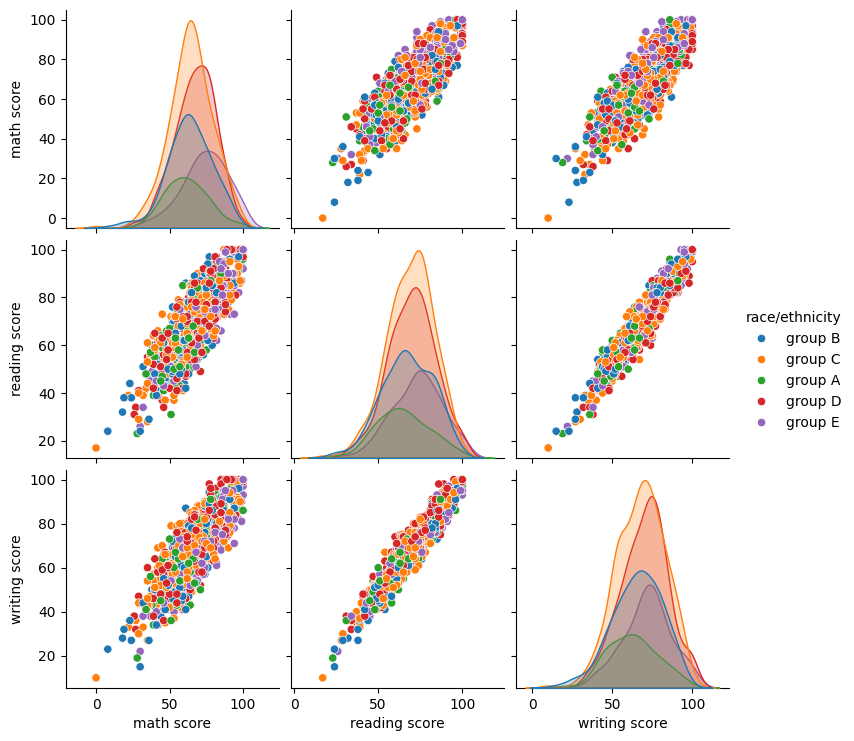

In [101]:
sns.pairplot(data = df, hue = 'race/ethnicity')

# Notas por grupos de etnias do dataframe

<Axes: xlabel='math score', ylabel='race/ethnicity'>

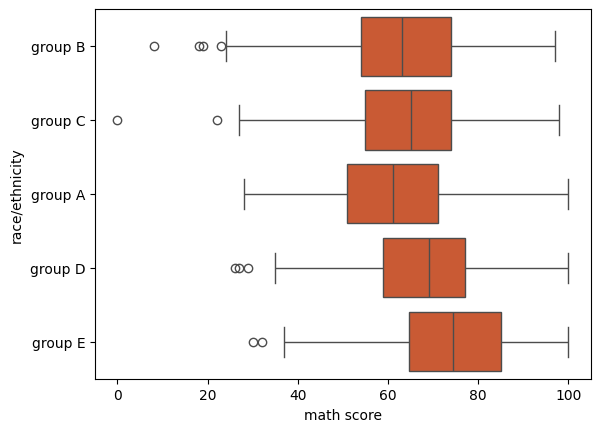

In [110]:
sns.boxplot(data = df, x='math score', y='race/ethnicity', color='#e24e1b')

<Axes: xlabel='reading score', ylabel='race/ethnicity'>

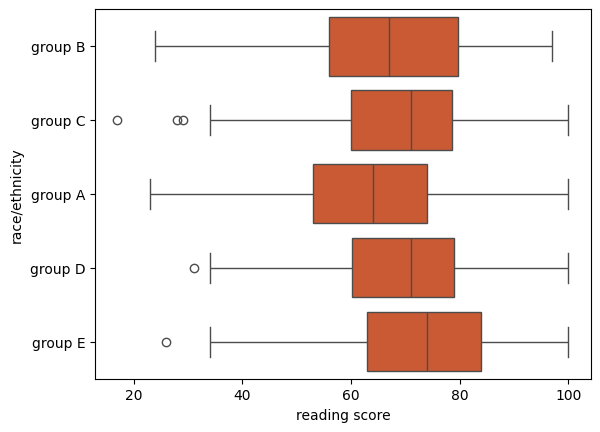

In [111]:
sns.boxplot(data = df, x='reading score', y='race/ethnicity',color='#e24e1b')

<Axes: xlabel='writing score', ylabel='race/ethnicity'>

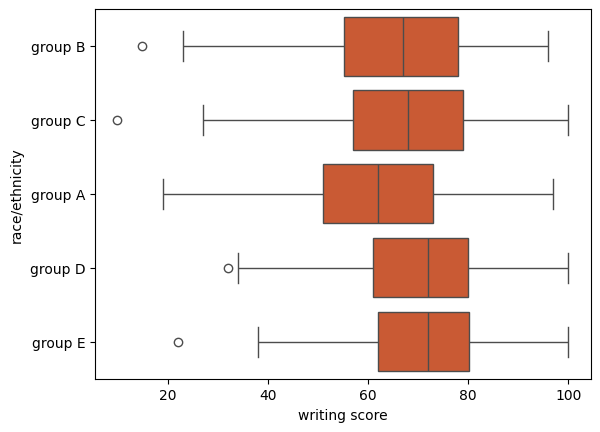

In [120]:
sns.boxplot(data = df, x='writing score', y='race/ethnicity', color='#e24e1b')

# Notas por níveis de estudo dos parentes

<Axes: xlabel='math score', ylabel='parental level of education'>

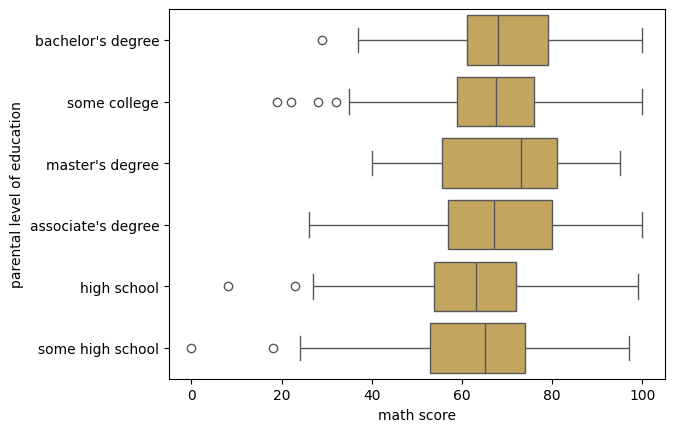

In [117]:
sns.boxplot(data = df, x='math score', y='parental level of education', color = '#d5ac4e')

<Axes: xlabel='reading score', ylabel='parental level of education'>

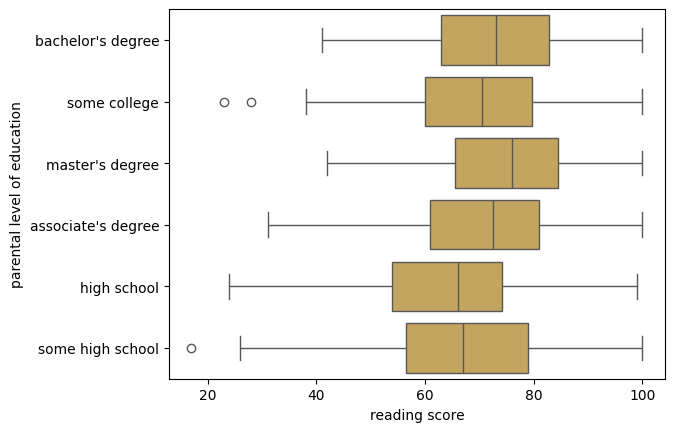

In [118]:
sns.boxplot(data = df, x='reading score', y='parental level of education', color = '#d5ac4e')

<Axes: xlabel='writing score', ylabel='parental level of education'>

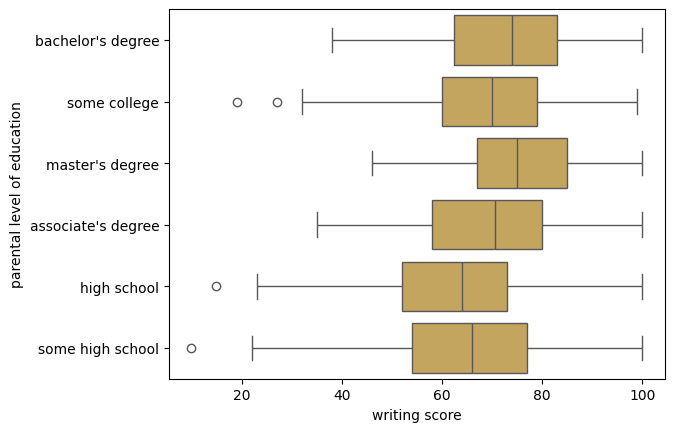

In [119]:
sns.boxplot(data = df, x='writing score', y='parental level of education', color = '#d5ac4e')

# Agrupamento por nível de educação dos parentes
Descrição em tabelas dos gráficos acima

In [124]:
df.groupby(by = ['parental level of education']).describe()['math score']

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,67.882883,15.112093,26.0,57.00,67.0,80.0,100.0
bachelor's degree,118.0,69.389831,14.943789,29.0,61.00,68.0,79.0,100.0
high school,196.0,62.137755,14.539651,8.0,53.75,63.0,72.0,99.0
master's degree,59.0,69.745763,15.153915,40.0,55.50,73.0,81.0,95.0
some college,226.0,67.128319,14.312897,19.0,59.00,67.5,76.0,100.0
some high school,179.0,63.497207,15.927989,0.0,53.00,65.0,74.0,97.0


In [125]:
df.groupby(by = ['parental level of education']).describe()['reading score']

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,70.927928,13.868948,31.0,61.0,72.5,81.00,100.0
bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
high school,196.0,64.704082,14.132130,24.0,54.0,66.0,74.25,99.0
master's degree,59.0,75.372881,13.775163,42.0,65.5,76.0,84.50,100.0
some college,226.0,69.460177,14.057049,23.0,60.0,70.5,79.75,100.0
some high school,179.0,66.938547,15.479295,17.0,56.5,67.0,79.00,100.0


In [126]:
df.groupby(by = ['parental level of education']).describe()['writing score']

,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,69.896396,14.311122,35.0,58.0,70.5,80.0,100.0
bachelor's degree,118.0,73.381356,14.728262,38.0,62.5,74.0,83.0,100.0
high school,196.0,62.448980,14.085907,15.0,52.0,64.0,73.0,100.0
master's degree,59.0,75.677966,13.730711,46.0,67.0,75.0,85.0,100.0
some college,226.0,68.840708,15.012331,19.0,60.0,70.0,79.0,99.0
some high school,179.0,64.888268,15.736197,10.0,54.0,66.0,77.0,100.0


# Agrupamento por teste preparatório

In [127]:
df.groupby(by = ['test preparation course']).describe()['writing score']

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,74.418994,13.375335,36.0,66.0,76.0,83.0,100.0
none,642.0,64.504673,14.999661,10.0,54.0,65.0,74.0,100.0


In [128]:
df.groupby(by = ['test preparation course']).describe()['math score']

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0


In [129]:
df.groupby(by = ['test preparation course']).describe()['reading score']

,count,mean,std,min,25%,50%,75%,max
test preparation course,,,,,,,,
completed,358.0,73.893855,13.638384,37.0,65.0,75.0,84.0,100.0
none,642.0,66.534268,14.463885,17.0,57.0,67.0,76.0,100.0
